In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [71]:
df = df.drop(['stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'],axis=1)
df

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [72]:
new_df = ['area','bedrooms','bathrooms','price']
df = df[new_df]
df

,area,bedrooms,bathrooms,price
0,7420,4,2,13300000
1,8960,4,4,12250000
2,9960,3,2,12250000
3,7500,4,2,12215000
4,7420,4,1,11410000
...,...,...,...,...
540,3000,2,1,1820000
541,2400,3,1,1767150
542,3620,2,1,1750000
543,2910,3,1,1750000


In [73]:
df.describe()

,area,bedrooms,bathrooms,price
count,545.00,545.00,545.00,545.00
mean,5150.54,2.97,1.29,4766729.25
std,2170.14,0.74,0.50,1870439.62
min,1650.00,1.00,1.00,1750000.00
25%,3600.00,2.00,1.00,3430000.00
50%,4600.00,3.00,1.00,4340000.00
75%,6360.00,3.00,2.00,5740000.00
max,16200.00,6.00,4.00,13300000.00


In [74]:
df['price'].dtype

dtype('int64')

In [75]:
pd.options.display.float_format = '{:.2f}'.format

In [76]:
df.head()

,area,bedrooms,bathrooms,price
0,7420,4,2,13300000
1,8960,4,4,12250000
2,9960,3,2,12250000
3,7500,4,2,12215000
4,7420,4,1,11410000


In [77]:
df.describe()

,area,bedrooms,bathrooms,price
count,545.00,545.00,545.00,545.00
mean,5150.54,2.97,1.29,4766729.25
std,2170.14,0.74,0.50,1870439.62
min,1650.00,1.00,1.00,1750000.00
25%,3600.00,2.00,1.00,3430000.00
50%,4600.00,3.00,1.00,4340000.00
75%,6360.00,3.00,2.00,5740000.00
max,16200.00,6.00,4.00,13300000.00


In [94]:
df['price'] = df['price'].astype(int)

In [95]:
df

,area,bedrooms,bathrooms,price
0,7420,4,2,13300000
1,8960,4,4,12250000
2,9960,3,2,12250000
3,7500,4,2,12215000
4,7420,4,1,11410000
...,...,...,...,...
540,3000,2,1,1820000
541,2400,3,1,1767150
542,3620,2,1,1750000
543,2910,3,1,1750000


In [96]:
print(df['price'])

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int32


<Axes: xlabel='price', ylabel='Count'>

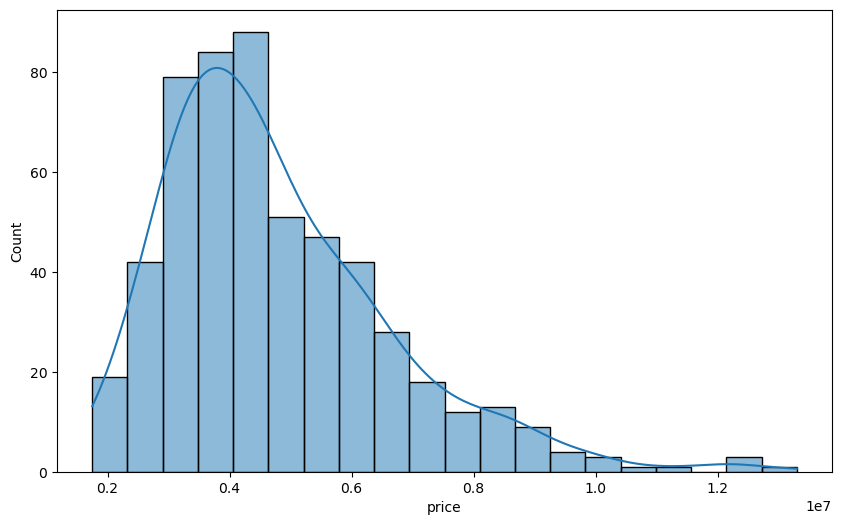

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=20,kde=True)

In [98]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=101)

In [99]:
X_train.head()

,area,bedrooms,bathrooms
375,5960,3,1
187,6100,3,1
109,6615,4,2
454,4500,3,1
382,3150,3,1


In [100]:
y_train.head()

375    3640000
187    5110000
109    6090000
454    3143000
382    3570000
Name: price, dtype: int32

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [113]:
y_pred = model.predict(X_test_scaled)

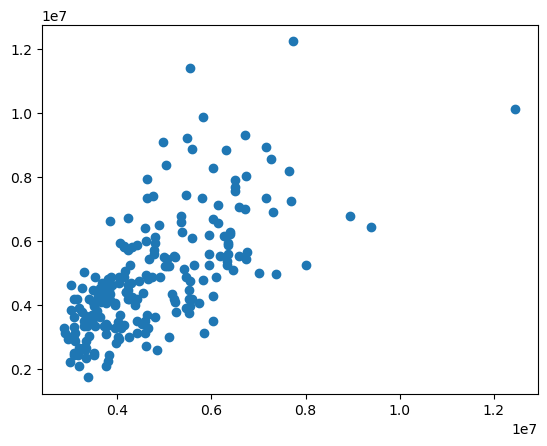

In [114]:
plt.scatter(y_pred,y_test)

C:\Users\Vivek Shahare\AppData\Local\Temp\ipykernel_23916\3168398915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50)


<Axes: xlabel='price', ylabel='Density'>

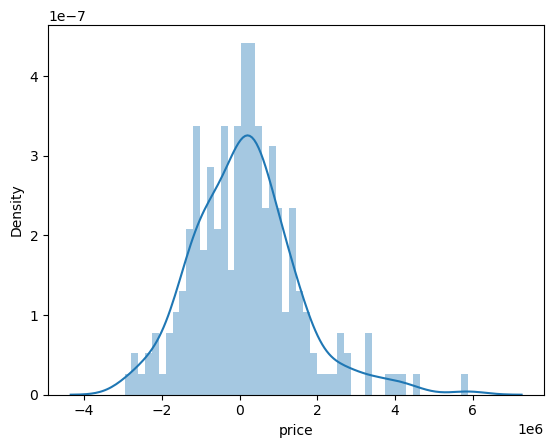

In [115]:
sns.distplot((y_test-y_pred),bins=50)

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
r2 = r2_score(y_pred,y_test)
mbe = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)

In [107]:
print(r2)
print(mbe)
print(mse)

0.043491983674132983
1013616.75011551
1853592032397.3142


In [120]:
new_house = [[1650, 1, 1]]  # Example input: 6615 square feet, 4 bedrooms, 2 bathrooms

# Transform the new data with the same scaler
new_house_scaled = scaler.transform(new_house)

# Predict the price using the trained model
predicted_price = model.predict(new_house_scaled)
print(predicted_price)

[2185767.92362784]


C:\Users\Vivek Shahare\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [124]:
import pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler have been pickled and saved to disk.")

Model and scaler have been pickled and saved to disk.
